In [55]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
file_path = r"https://raw.githubusercontent.com/ajayt0m/Ensemble-Techniques/main/Pistachio_28_Features_Dataset.xlsx"

pistachio_df = pd.read_excel(file_path)

In [23]:
pistachio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [24]:
pistachio_df.describe()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,...,191.995311,21.380084,22.591454,22.427056,-0.735243,-0.615580,-0.367142,3.054000,2.903015,2.940572
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,...,13.030505,3.127813,3.622222,3.926325,0.384584,0.389219,0.426964,0.733993,0.651383,0.750171
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,...,146.787600,10.611100,11.985400,11.197100,-1.931600,-1.658200,-2.348600,1.662400,1.665500,1.522500
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,...,182.930675,19.253550,20.036675,19.722425,-0.990900,-0.875975,-0.645800,2.509700,2.437400,2.449425
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,...,192.036350,21.425100,22.523250,22.276900,-0.756600,-0.653050,-0.424550,2.941750,2.807050,2.783350
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,...,201.097725,23.695900,25.241900,25.140125,-0.502500,-0.405000,-0.158400,3.446500,3.247400,3.224650
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,...,235.000700,30.838300,33.614600,42.756600,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


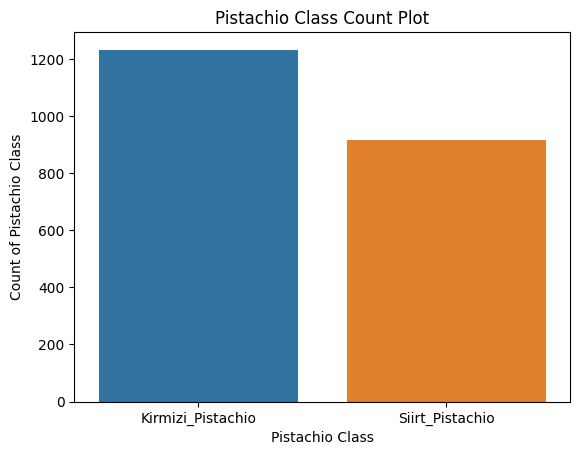

In [25]:
sns.countplot(data=pistachio_df, x="Class")
plt.xlabel("Pistachio Class")
plt.ylabel("Count of Pistachio Class")
plt.title("Pistachio Class Count Plot")
plt.show()

In [26]:
X = pistachio_df.iloc[:,:-1]
y = pistachio_df.iloc[:,-1]

X.shape, y.shape

((2148, 28), (2148,))

In [27]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=36)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1611, 28), (537, 28), (1611,), (537,))

# Modelling

## 1. Random Forest

In [29]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(criterion="gini", 
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

## 2. XG-Boost

In [30]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    max_depth=8,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27
)

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 3. ADA-Boost

In [31]:
# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners
    learning_rate=1,  # Learning rate
    algorithm='SAMME.R'  # Default algorithm
)

ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

## 4. Gradient Boost

In [32]:
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be run
    learning_rate=0.1,  # Shrinks the contribution of each weak learner
    max_depth=3,  # Maximum depth of the individual trees
    random_state=27
)

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=27)

# Predict

In [33]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_ada = ada_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)

In [34]:
# Reverse label encoding for predictions
y_pred_rf_original = label_encoder.inverse_transform(y_pred_rf)
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)
y_pred_ada_original = label_encoder.inverse_transform(y_pred_ada)
y_pred_gb_original = label_encoder.inverse_transform(y_pred_gb)

y_test_original = label_encoder.inverse_transform(y_test)

# Results & Analysis

In [53]:
rf_importance = rf_classifier.feature_importances_
xgb_importance = xgb_classifier.feature_importances_
ada_importance = ada_classifier.feature_importances_
gb_importance = gb_classifier.feature_importances_

print("\nFeature Importance of Random Forest Classifier:", rf_importance)
print("\nFeature Importance of XGBoost Classifier:", xgb_importance)
print("\nFeature Importance of ADABoost Classifier:", ada_importance)
print("\nFeature Importance of Gradient Boost Classifier:", gb_importance)


Feature Importance of Random Forest Classifier: [0.05835129 0.00934188 0.01283348 0.14668885 0.0627151  0.05203053
 0.00939367 0.03101613 0.00731768 0.05180489 0.01179754 0.0853489
 0.14927135 0.00397548 0.11015278 0.02837221 0.0170084  0.01464006
 0.00688734 0.02445322 0.01195833 0.01496411 0.01610698 0.02548533
 0.00953048 0.00743474 0.01013382 0.01098542]

Feature Importance of XGBoost Classifier: [0.01926647 0.01378752 0.01364742 0.10425178 0.01390624 0.01669069
 0.0102204  0.02383106 0.01008629 0.01909829 0.00804125 0.06512163
 0.43017513 0.00699294 0.03232285 0.02694672 0.0170339  0.01457055
 0.01138396 0.02310717 0.0142415  0.01411708 0.01799587 0.01639916
 0.01946466 0.0091532  0.01322347 0.01492275]

Feature Importance of ADABoost Classifier: [0.   0.02 0.   0.06 0.02 0.04 0.02 0.02 0.02 0.   0.   0.   0.04 0.
 0.04 0.04 0.06 0.04 0.02 0.22 0.02 0.02 0.06 0.06 0.   0.02 0.12 0.04]

Feature Importance of Gradient Boost Classifier: [0.0026301  0.00214268 0.00240302 0.28911584 0

## Confusion Matrix

In [41]:
print("\nConfusion Matrix - Random Forest Classifier:\n", confusion_matrix(y_test_original,y_pred_rf_original))
print("\nConfusion Matrix - XGBoost Classifier:\n", confusion_matrix(y_test_original,y_pred_xgb_original))
print("\nConfusion Matrix - ADABoost Classifier:\n", confusion_matrix(y_test_original,y_pred_ada_original))
print("\nConfusion Matrix - Gradient Boost Classifier:\n", confusion_matrix(y_test_original,y_pred_gb_original))


Confusion Matrix - Random Forest Classifier:
 [[306  26]
 [ 37 168]]

Confusion Matrix - XGBoost Classifier:
 [[314  18]
 [ 25 180]]

Confusion Matrix - ADABoost Classifier:
 [[308  24]
 [ 34 171]]

Confusion Matrix - Gradient Boost Classifier:
 [[313  19]
 [ 35 170]]


## Accuracy

In [46]:
print("\nAccuracy Score - Random Forest Classifier:", accuracy_score(y_test_original,y_pred_rf_original))
print("\nAccuracy Score - XGBoost Classifier:", accuracy_score(y_test_original,y_pred_xgb_original))
print("\nAccuracy Score - ADABoost Classifier:", accuracy_score(y_test_original,y_pred_ada_original))
print("\nAccuracy Score - Gradient Boost Classifier:", accuracy_score(y_test_original,y_pred_gb_original))


Accuracy Score - Random Forest Classifier: 0.88268156424581

Accuracy Score - XGBoost Classifier: 0.9199255121042831

Accuracy Score - ADABoost Classifier: 0.8919925512104283

Accuracy Score - Gradient Boost Classifier: 0.8994413407821229


## Cross-Validation

In [50]:
print("\nCross Validation Score - Random Forest Classifier:\n", cross_val_score(rf_classifier,X_train,y_train,cv=10))
print("\nCross Validation Score - XGBoost Classifier:\n", cross_val_score(xgb_classifier,X_train,y_train,cv=10))
print("\nCross Validation Score - ADABoost Classifier:\n", cross_val_score(ada_classifier,X_train,y_train,cv=10))
print("\nCross Validation Score - Gradient Boost Classifier:\n", cross_val_score(gb_classifier,X_train,y_train,cv=10))


Cross Validation Score - Random Forest Classifier:
 [0.95061728 0.89440994 0.86335404 0.89440994 0.85093168 0.92546584
 0.93167702 0.91304348 0.89440994 0.8757764 ]

Cross Validation Score - XGBoost Classifier:
 [0.93209877 0.92546584 0.8757764  0.9068323  0.89440994 0.94409938
 0.9068323  0.93167702 0.90062112 0.90062112]

Cross Validation Score - ADABoost Classifier:
 [0.92592593 0.88819876 0.8757764  0.89440994 0.89440994 0.91304348
 0.95652174 0.9378882  0.8757764  0.91925466]

Cross Validation Score - Gradient Boost Classifier:
 [0.94444444 0.9068323  0.9068323  0.9068323  0.89440994 0.92546584
 0.91304348 0.94409938 0.89440994 0.90062112]


## Classification Report

In [51]:
print("\nClassification Report - Random Forest Classifier:\n", classification_report(y_test_original,y_pred_rf_original))
print("\nClassification Report - XGBoost Classifier:\n", classification_report(y_test_original,y_pred_xgb_original))
print("\nClassification Report - ADABoost Classifier:\n", classification_report(y_test_original,y_pred_ada_original))
print("\nClassification Report - Gradient Boost Classifier:\n", classification_report(y_test_original,y_pred_gb_original))


Classification Report - Random Forest Classifier:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.89      0.92      0.91       332
  Siirt_Pistachio       0.87      0.82      0.84       205

         accuracy                           0.88       537
        macro avg       0.88      0.87      0.87       537
     weighted avg       0.88      0.88      0.88       537


Classification Report - XGBoost Classifier:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.93      0.95      0.94       332
  Siirt_Pistachio       0.91      0.88      0.89       205

         accuracy                           0.92       537
        macro avg       0.92      0.91      0.91       537
     weighted avg       0.92      0.92      0.92       537


Classification Report - ADABoost Classifier:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.90      0.93      0.91       332
  Siirt_Pistachio     

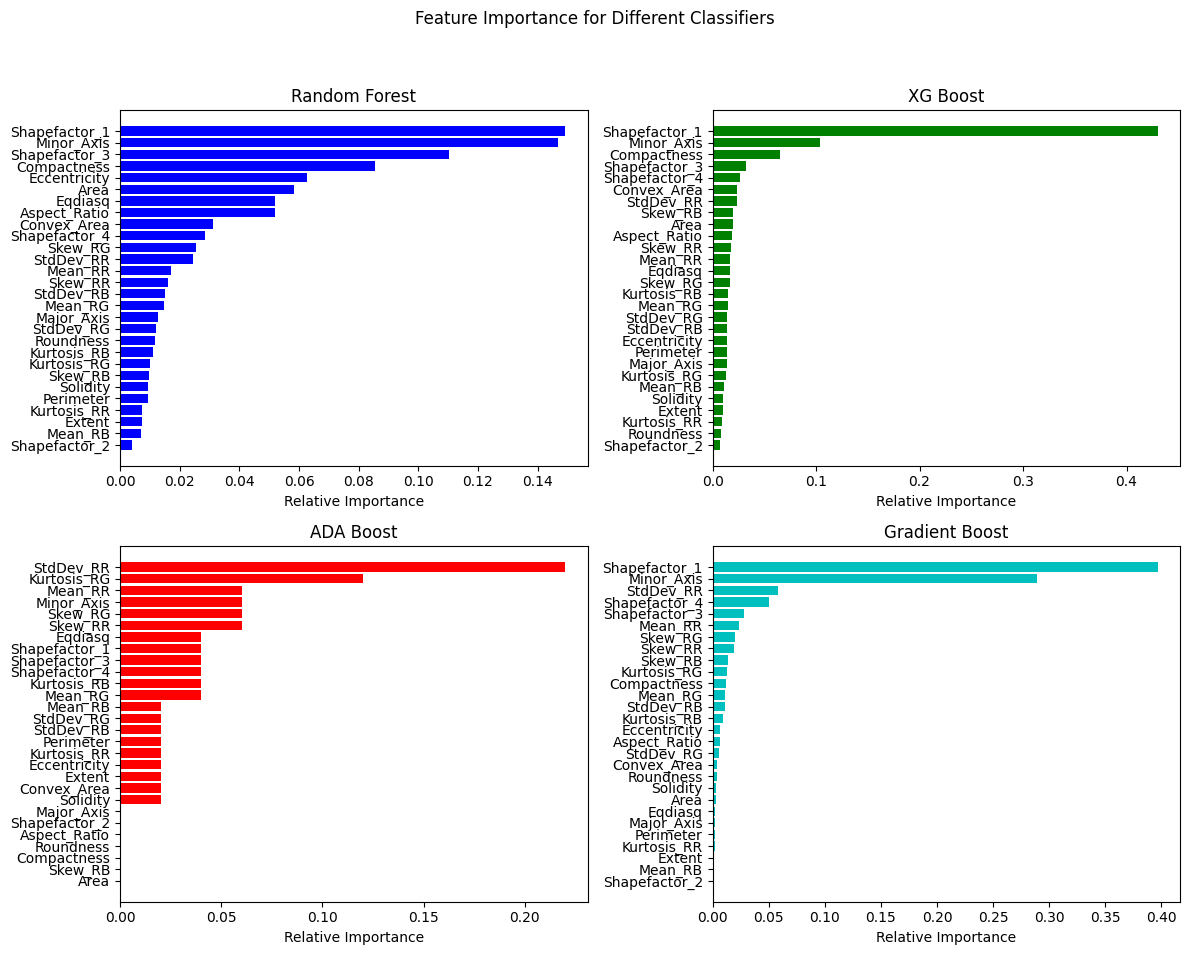

In [64]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Feature Importance for Different Classifiers')

features = pistachio_df.columns

# Random Forest
indices_rf = np.argsort(rf_importance)
axes[0, 0].barh(range(len(indices_rf)), rf_importance[indices_rf], color='b', align='center')
axes[0, 0].set_yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
axes[0, 0].set_xlabel('Relative Importance')
axes[0, 0].set_title('Random Forest')

# XGBoost
indices_xgb = np.argsort(xgb_importance)
axes[0, 1].barh(range(len(indices_xgb)), xgb_importance[indices_xgb], color='g', align='center')
axes[0, 1].set_yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
axes[0, 1].set_xlabel('Relative Importance')
axes[0, 1].set_title('XG Boost')

# ADA Boost
indices_ada = np.argsort(ada_importance)
axes[1, 0].barh(range(len(indices_ada)), ada_importance[indices_ada], color='r', align='center')
axes[1, 0].set_yticks(range(len(indices_ada)), [features[i] for i in indices_ada])
axes[1, 0].set_xlabel('Relative Importance')
axes[1, 0].set_title('ADA Boost')

# Gradient Boost
indices_gb = np.argsort(gb_importance)
axes[1, 1].barh(range(len(indices_gb)), gb_importance[indices_gb], color='c', align='center')
axes[1, 1].set_yticks(range(len(indices_gb)), [features[i] for i in indices_gb])
axes[1, 1].set_xlabel('Relative Importance')
axes[1, 1].set_title('Gradient Boost')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

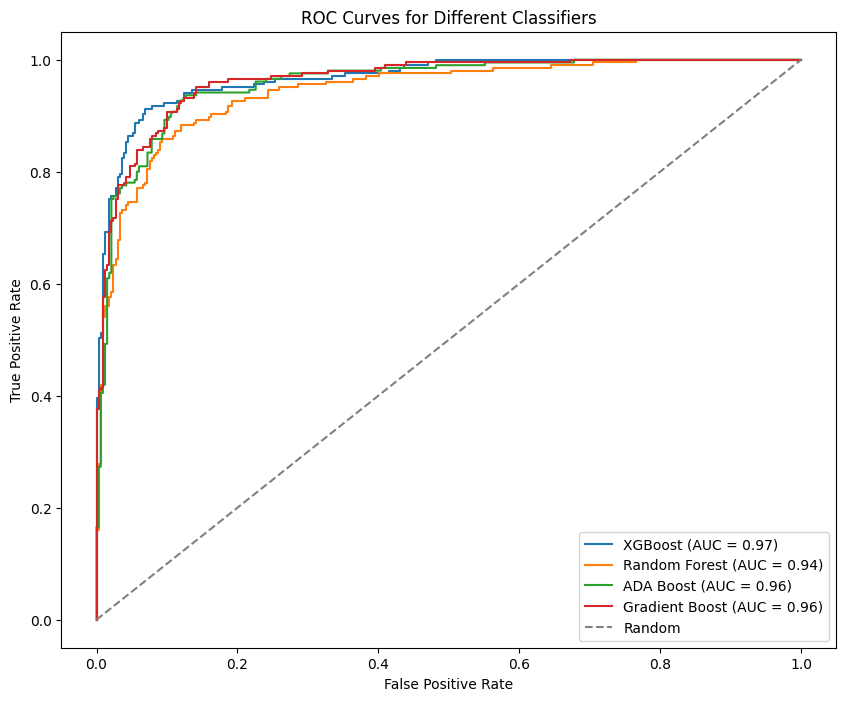

In [65]:
# Calculate AUC and plot ROC curves for all classifiers
classifiers = [xgb_classifier, rf_classifier, ada_classifier, gb_classifier]
labels = ['XGBoost', 'Random Forest', 'ADA Boost', 'Gradient Boost']

plt.figure(figsize=(10, 8))

for clf, label in zip(classifiers, labels):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()